# K-means clustering

In this part we will see how to apply k-means clustering, an unsupervised learning technique which helps us to discover the clusters in our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the Data

We'll again use the cleaned diabetes data.

In [18]:
#@title Load the file from github instead

link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/diabetes_clean.csv"
db_df = pd.read_csv(link_to_file)
print(db_df.shape)
db_df.head()

(488, 10)


,Age,Sex,BloodPressure,GeneticRisk,BMI,PhysicalActivity,Married,Work,Smoker,Diabetes
0,34,Male,84,0.619,24.7,93,Yes,Self-employed,Unknown,0
1,25,Male,74,0.591,22.5,102,No,Public,Unknown,0
2,50,Male,80,0.178,34.5,98,Yes,Self-employed,Unknown,1
3,27,Female,60,0.206,26.3,82,Yes,Private,Never,0
4,35,Male,84,0.286,35.0,58,Yes,Private,Smoker,1


## Exercise 1 (5 mins)

Select the numeric columns and center and scale them to prepare for clustering. The resulting np array should be called `db_scale`.

In [11]:
numeric = db_df.select_dtypes(include='number')
# Step 1: Select the desired numeric columns
numeric = db_df[['Age', 'BloodPressure', 'GeneticRisk', 'BMI', 'PhysicalActivity']]

# Step 2: Convert to numpy array (optional, but required by StandardScaler)
numeric_array = numeric.to_numpy()

# Step 3: Scale the data
scaling = StandardScaler()
db_scale = scaling.fit_transform(numeric_array)

# Result
db_scale


array([[ 0.02191158,  0.87019947,  0.4218644 , -0.82463519,  0.34685681],
       [-0.77342442,  0.09357668,  0.33460369, -1.1548091 ,  0.70404207],
       [ 1.43584224,  0.55955035, -0.95249176,  0.64613953,  0.54529307],
       ...,
       [ 0.28702358,  0.87019947,  0.66183135, -0.854651  ,  1.7359106 ],
       [-0.41994175,  1.02552403,  1.01087419,  0.81122648, -1.32000772],
       [ 0.11028225,  1.33617314, -0.52865404,  0.94629763, -0.3675137 ]])

In [13]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()

## The kmeans object

Just like before for linear regression and decision tree, we need to define a kmeans object that we will then fit with our data.

In [8]:
from sklearn.cluster import KMeans

#init a kmeans object with 3 clusters and 10 different, random initalizations
#We will set the random_state so we always get the same result for teaching purposes
kmeans_obj = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [14]:
#perform kmeans clustering on the data
kmeans_obj.fit(db_scale)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

## Exercise 2 (10 mins)

Inspect the fitted kmeans object (`vars(kmeans_obj)`). Which trainable parameters (i.e. attributes that have only obtained values after fitting) does it have? What do you think they mean?

Now, compare with the [kmeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Which attribute corresponds to something like an error or a performance measure?

In [15]:
vars(kmeans_obj)

{'n_clusters': 3,
 'init': 'random',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': 42,
 'copy_x': True,
 'algorithm': 'lloyd',
 'n_features_in_': 5,
 '_tol': np.float64(0.00010000000000000003),
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 1,
 'cluster_centers_': array([[-0.64496809, -0.39441465, -0.26141008, -0.81767276,  0.71856679],
        [ 1.25843647,  0.7429034 , -0.24728277,  0.21485972, -0.2126439 ],
        [-0.26241143, -0.13844541,  0.5192681 ,  0.80777746, -0.69018831]]),
 '_n_features_out': 3,
 'labels_': array([0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1,
        2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2,
        0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1,
        2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 

## Visualization

We can't directly visualize these clusters since we have 5d data and we can't plot in 5 dimensions.

What could we do in order to visualize the data and where the cluster centers (centroids) are anyway?

<img src="https://upload.wikimedia.org/wikipedia/commons/4/45/The_Thinker,_Auguste_Rodin.jpg" width="300">

# Exercise 3 (15 mins)

1. Define and fit a PCA object with 4 PCs on the data we put into the kmeans clustering. Make a dataframe called `pca_df` that contains the data transformed into the PCA space, like we did in [Investigating the PCA output](https://colab.research.google.com/drive/10bJ0uobV7pRRD_8UmMuc0EHsmLcFtlhs#scrollTo=YxgrvYJfHQJ-).
2. Plot PCs 1 and 2 in a scatter plot.
3. Add a new column to `pca_df` that contains the info of which cluster each data point was assigned to by kmeans. You can find this information in one of the attributes of the kmeans_obj.
4. Color the scatter plot according to cluster (the new column added in 3.) Have a look at [Plotting with Seaborn](https://colab.research.google.com/drive/18qJ5H66UPCYeQ58aRxcoPepJiEB6Qeh7#scrollTo=cxaRssFoCSbk) if you have problems with this.

In [19]:
# fit a PCA object with 4 PCs on the data we put into the kmeans clustering
from sklearn.decomposition import PCA
#Init a PCA object
#We'll use the first 4 PCs.
PCA_obj = PCA(n_components = 4)

In [20]:
PCA_obj

PCA(n_components=4)

In [21]:
transformed = PCA_obj.fit_transform(db_scale)

In [22]:
transformed

array([[-0.16651806,  0.73713042,  0.83058353, -0.09580268],
       [-1.21998644,  0.13657767,  0.80726908, -0.15051314],
       [ 0.69777077,  1.44213811, -0.52126768,  0.09910921],
       ...,
       [-0.69151593,  1.2785098 ,  1.69313988, -0.09615182],
       [ 1.60935478, -0.73951173,  0.36011807, -0.73611603],
       [ 1.14920753,  0.63515778, -0.42704211, -1.09588429]])

In [23]:
pca_df = pd.DataFrame(transformed, columns= ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df

,PC1,PC2,PC3,PC4
0,-0.166518,0.737130,0.830584,-0.095803
1,-1.219986,0.136578,0.807269,-0.150513
2,0.697771,1.442138,-0.521268,0.099109
3,-1.183386,-0.391868,-0.910135,0.216528
4,1.150921,0.225082,-0.903728,-0.648299
...,...,...,...,...
483,1.253394,0.708053,-0.260889,-0.510031
484,2.030914,1.049255,0.070843,0.520961
485,-0.691516,1.278510,1.693140,-0.096152
486,1.609355,-0.739512,0.360118,-0.736116


<Axes: xlabel='PC1', ylabel='PC2'>

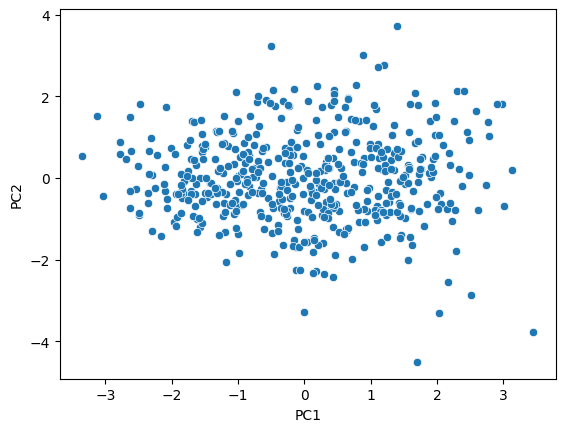

In [24]:
sns.scatterplot(pca_df, x = 'PC1', y = 'PC2')

In [25]:
pca_df['cluster'] = kmeans_obj.labels_

In [26]:
pca_df.head()

,PC1,PC2,PC3,PC4,cluster
0,-0.166518,0.737130,0.830584,-0.095803,0
1,-1.219986,0.136578,0.807269,-0.150513,0
2,0.697771,1.442138,-0.521268,0.099109,1
3,-1.183386,-0.391868,-0.910135,0.216528,0
4,1.150921,0.225082,-0.903728,-0.648299,1


<Axes: xlabel='PC1', ylabel='PC2'>

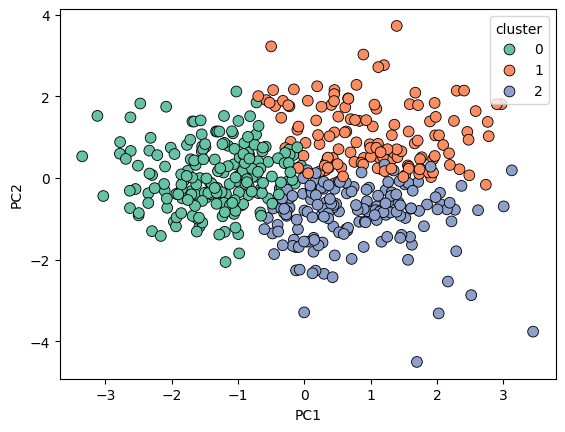

In [28]:
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='Set2',
    s=60,
    edgecolor='black'
)



Alright, now we see how the clusters are assigned among our data. Remember, this is a projection down to 2D of data which is originally 5 dimensional!

Now how can we add the location of the centroids (the imaginary cluster centers) to this figure?

We have a fitted PCA object which has been trained on the 5D data we which to represent: `PCA_obj` or whatever you have called it.

And we have the locations of the clusters centers in those 5 dimensions:

In [29]:
kmeans_obj.cluster_centers_

array([[-0.64496809, -0.39441465, -0.26141008, -0.81767276,  0.71856679],
       [ 1.25843647,  0.7429034 , -0.24728277,  0.21485972, -0.2126439 ],
       [-0.26241143, -0.13844541,  0.5192681 ,  0.80777746, -0.69018831]])

We can transform the location of the clusters into the space of the PCs by giving them to the trained PCA object.

In [30]:
pca_centers = PCA_obj.transform(kmeans_obj.cluster_centers_)
pca_centers

array([[-1.33664498,  0.05418539,  0.15412024, -0.06276456],
       [ 1.01983909,  1.04003789, -0.19126078,  0.33699087],
       [ 0.76813992, -0.92445345, -0.02771208, -0.20275441]])

We will also make them into a pandas dataframe.

In [33]:
pca_centers = pd.DataFrame(pca_centers, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [39]:
pca_centers

,PC1,PC2,PC3,PC4
0,-1.336645,0.054185,0.154120,-0.062765
1,1.019839,1.040038,-0.191261,0.336991
2,0.768140,-0.924453,-0.027712,-0.202754


And now we can plot them in the same figure together with data points projected into the PCA space (using PC1 and PC2 as before).

Note: Change `cluster_label` to what you have named the column indicating which cluster a point belongs to.

<Axes: xlabel='PC1', ylabel='PC2'>

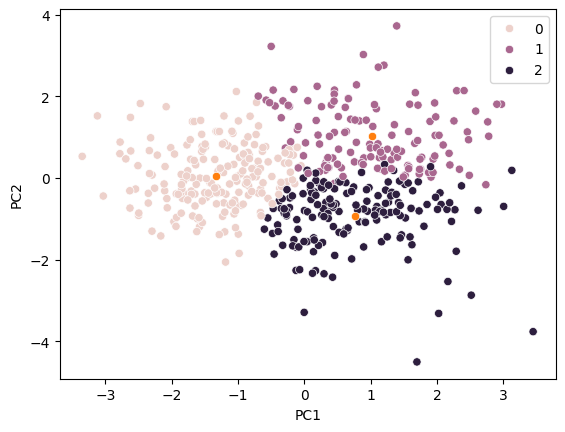

In [42]:
sns.scatterplot(pca_df, x = 'PC1', y = 'PC2', hue = 'cluster')
sns.scatterplot(pca_centers, x = 'PC1', y = 'PC2')

## Finding the optimal number of clusters

There are two methods of determining the best number of clusters which are usually used in concert.

### Elbow method

In this method we observe how the sum of squared errors (sse) changes as we vary the number of clusters.

Obviously, the lowest sse is what we get when every data point is their own cluster, but that is not very useful. We're instead looking for the 'elbow' in the curve of sses where the sse does not improve much more anymore when we add clusters and the trend flattens out.

<img src="https://realpython.com/cdn-cgi/image/width=442,format=auto/https://files.realpython.com/media/elbow_method.f10515cf445d.png" width="400">



To create the elbow plot we'll intialize and train kmeans objects with different amounts of clusters in a loop and record the sse for each of them. In `sk-learn` the sse is represented in the `.inertia_` attribute.

In [44]:
sses = []
#Testing between 1 and 11 clusters.
for k in range(1, 11):
    #Use the same intialization parameters as before, except the number of clusters
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(db_scale)
    sses.append(kmeans.inertia_)

And here are our recorded sums of square errors for each number of clusters:

In [45]:
sses

[2439.999999999998,
 1822.7881418865888,
 1542.3385108004588,
 1334.808182036146,
 1196.5285516106248,
 1114.700069196506,
 1040.1632707276017,
 992.9184663713236,
 927.4378664010139,
 879.6110424916413]

Let's make an elbow plot:

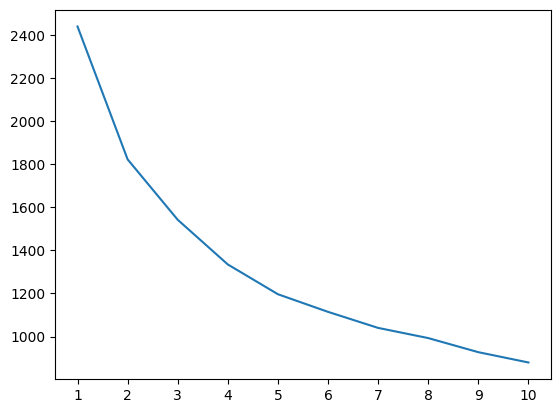

In [46]:
sns.lineplot(x = range(1,11), y = sses)
plt.xticks(range(1, 11))
plt.show()

It looks like the elbow in the plot is at 2 clusters.

### Silhouette coefficient

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster, by looking at how close it is to other points in its cluster and how far from points of other clusters. You need to have at least 2 clusters for the silhouette coefficient to be defined.

Unlike the elbow of the sums of square errors, the silhouette score is supposed to peak:

<img src="https://realpython.com/cdn-cgi/image/width=446,format=auto/https://files.realpython.com/media/silhouette_scores.9e4e63c679ef.png" width="400">


In [47]:
#The challenge with this method is that you need to know how to spell 'silhouette'.
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice that this time we start at 2 clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(db_scale)
    score = silhouette_score(db_scale, kmeans.labels_)
    silhouette_coefficients.append(score)

Now we can plot the silhouette coef's we have calculated for each number of clusters.

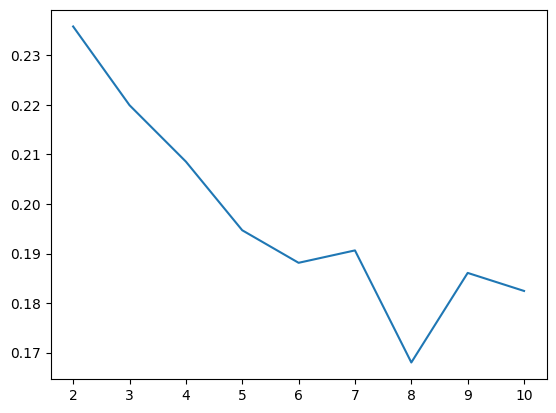

In [48]:
sns.lineplot(x = range(2,11), y = silhouette_coefficients)
plt.xticks(range(2, 11))
plt.show()

The peak is also at 2, in agreement with the elbow. This is not too bad since this is a binary classification dataset where participants either have diabetes or not.

## Group exercise: 25 mins

Load in the Boston Housing data and perform kmeans clustering. Visualize your results as we did with PCA. What do you think? Do you like the number of clusters?

Then, establish the optimal number of clusters for the data set by using the elbow and silhouette methods.

## Extra

If you are done early, you can redo kmeans clustering on the diabetes data with 2 clusters and compare the assigned cluster labels to the known diabetes outcome. Do the diabetic/non-diabetic data points cluster together?